In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestRegressor
import joblib

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

# Extract the data

In [2]:
df_2020 = pd.read_csv(r"C:\Users\rapha\Desktop\Coding\Untitled Folder 1\DVF\valeursfoncieres-2020.txt\ValeursFoncieres-2020.txt", sep = "|")
df_2021 = pd.read_csv(r"C:\Users\rapha\Desktop\Coding\Untitled Folder 1\DVF\valeursfoncieres-2021.txt\ValeursFoncieres-2021.txt", sep = "|")
df_2022 = pd.read_csv(r"C:\Users\rapha\Desktop\Coding\Untitled Folder 1\DVF\valeursfoncieres-2022.txt\ValeursFoncieres-2022.txt", sep = "|")
df_2023 = pd.read_csv(r"C:\Users\rapha\Desktop\Coding\Untitled Folder 1\DVF\valeursfoncieres-2023.txt\ValeursFoncieres-2023.txt", sep = "|")
df_2024 = pd.read_csv(r"C:\Users\rapha\Desktop\Coding\Untitled Folder 1\DVF\valeursfoncieres-2024.txt\ValeursFoncieres-2024.txt", sep = "|")

df = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index = True)

In [3]:
df.head(5)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.00


# Data Transformation

In [4]:
# Focusing on town concerned by the product, selecting parameters

post_code_list  = [1220]
type_build = ["Appartement", "Maison"]
nature_mutation = ['Vente']

# Filtering

df_1 = df.loc[df["Code postal"].isin(post_code_list) & df['Type local'].isin(type_build) & df['Nature mutation'].isin(nature_mutation)]
df_1['Type local'] = df_1['Type local'].replace("Vente", "1")

# Replacing "," by "."

df_1['Surface Carrez du 1er lot'] = df_1['Surface Carrez du 1er lot'].str.replace(",", ".")
df_1['Surface Carrez du 2eme lot'] = df_1['Surface Carrez du 2eme lot'].str.replace(",", ".")
df_1['Surface Carrez du 3eme lot'] = df_1['Surface Carrez du 3eme lot'].str.replace(",", ".")
df_1['Surface Carrez du 4eme lot'] = df_1['Surface Carrez du 4eme lot'].str.replace(",", ".")
df_1['Surface Carrez du 5eme lot'] = df_1['Surface Carrez du 5eme lot'].str.replace(",", ".")
df_1['Valeur fonciere'] = df_1['Valeur fonciere'].str.replace(",", ".")

# Adapting the format to numeric

df_1['Type local'] = df_1['Type local'].replace("Appartement", "1")
df_1['Type local'] = df_1['Type local'].replace("Maison", "2")
df_1['Nature mutation'] = df_1['Nature mutation'].replace("Vente", "1")
df_1['Type local'] = pd.to_numeric(df_1["Type local"], errors='coerce')
df_1['Nature mutation'] = pd.to_numeric(df_1["Nature mutation"], errors='coerce')
df_1['Surface Carrez du 1er lot'] = pd.to_numeric(df_1["Surface Carrez du 1er lot"], errors='coerce')
df_1['Surface Carrez du 2eme lot'] = pd.to_numeric(df_1["Surface Carrez du 2eme lot"], errors='coerce')
df_1['Surface Carrez du 3eme lot'] = pd.to_numeric(df_1["Surface Carrez du 3eme lot"], errors='coerce')
df_1['Surface Carrez du 4eme lot'] = pd.to_numeric(df_1["Surface Carrez du 4eme lot"], errors='coerce')
df_1['Surface Carrez du 5eme lot'] = pd.to_numeric(df_1["Surface Carrez du 5eme lot"], errors='coerce')
df_1['1er lot'] = pd.to_numeric(df_1["1er lot"], errors='coerce')
df_1['Valeur fonciere'] = pd.to_numeric(df_1["Valeur fonciere"], errors='coerce')


# Adding the year of transaction
df_1['Year'] = df_1['Date mutation'].str[6:]


In [5]:
df_1.dtypes

Identifiant de document       float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                  int64
Date mutation                  object
Nature mutation                 int64
Valeur fonciere               float64
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Commune                        object
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                       float64
Surface Carrez du 1er lot     float64
2eme lot    

In [6]:
df_1.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain', 'Year'],
      dtype='object')

# Data Exploration

In [7]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Identifiant de document,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reference document,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 Articles CGI,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Articles CGI,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 Articles CGI,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Articles CGI,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5 Articles CGI,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No disposition,1377.00,1.04,0.22,1.00,1.00,1.00,1.00,4.00
Nature mutation,1377.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Valeur fonciere,1376.00,685800.61,506402.08,1.00,365996.00,580000.00,869424.75,7381776.00


In [8]:
# Some columns are wrongly filled
df_1.loc[(df_1['Surface Carrez du 1er lot'].isna()) & (df_1['Surface Carrez du 2eme lot'].isna()) & (df_1['Surface Carrez du 4eme lot'].notna())][['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 4eme lot']].head(3)

,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 4eme lot
3560712,NaN,NaN,102.23
3565088,NaN,NaN,116.16
8217979,NaN,NaN,135.00


# Features engineering AND UNIQUE VALUE PROPOSITION

In [9]:
data = df_1[["Type local", 'Nature mutation',"Surface reelle bati", "Nombre pieces principales", "Surface terrain", "Nombre de lots", '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', "Surface Carrez du 3eme lot", "4eme lot", 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', "Year",'Valeur fonciere']]
data = data.fillna(0)
# Sometimes no Surface Carrez then Surface reelle bati is used
data['m2_approx'] = np.where(data['Surface Carrez du 1er lot'] == 0, data['Surface reelle bati'], data['Surface Carrez du 1er lot'])

# Prix m2 added
data['prix_m2'] = data['Valeur fonciere']/data['m2_approx'] 

# Really high PrixM2 permits to find that some data will product some noises then these data are rectified

data['m2_approx'] =  np.where(data['prix_m2'] > 14000, data['m2_approx']*2, data['m2_approx'])
data['Surface reelle bati'] =  np.where(data['prix_m2'] > 14000, data['Surface reelle bati']*2, data['Surface reelle bati'])
data['prix_m2'] =  np.where(data['prix_m2'] > 14000, data['prix_m2']/2, data['prix_m2'])


# Exclusion of outliers in terms of price per square meters

data = data.loc[~(data["m2_approx"] == 0)]
data = data.loc[(data["prix_m2"] > data["prix_m2"].quantile(0.05)) & (data["prix_m2"] < data["prix_m2"].quantile(0.95))]
#data = data.loc[(data["Valeur fonciere"] < 1000000)]


# UNIQUE VALUE PROPOSITION : The price per square meters evolve a lot depending on the state of the good so I am creating three different model in order sort the different state of app/houses. THen the user will be able to select if the good is new / recent or old.

data['tiers'] = 0
data.loc[(data["prix_m2"] > data["prix_m2"].quantile(0.00)) & (data["prix_m2"] < data["prix_m2"].quantile(0.35)), 'tiers'] = 1
data.loc[(data["prix_m2"] >= data["prix_m2"].quantile(0.35)) & (data["prix_m2"] < data["prix_m2"].quantile(0.75)), 'tiers'] = 2
data.loc[(data["prix_m2"] >= data["prix_m2"].quantile(0.75)) & (data["prix_m2"] <= data["prix_m2"].quantile(1)), 'tiers'] = 3

data_ML = data.reset_index()



In [10]:
data["prix_m2"].quantile(0.00)

np.float64(3496.503496503496)

In [11]:
data["prix_m2"].quantile(0.75)

np.float64(6802.467105263158)

# Base model - Simple regression

In [12]:
data_ML = data_ML.rename(columns={'Type local': 'type_bien',  'Nombre pieces principales' : 'nomb_piece', 'Surface terrain' : 'terr_m2', 'm2_approx' : 'hab_m2'})

mapetrain,  1
7.709698303065629
mapetest,  1
7.895979493623896


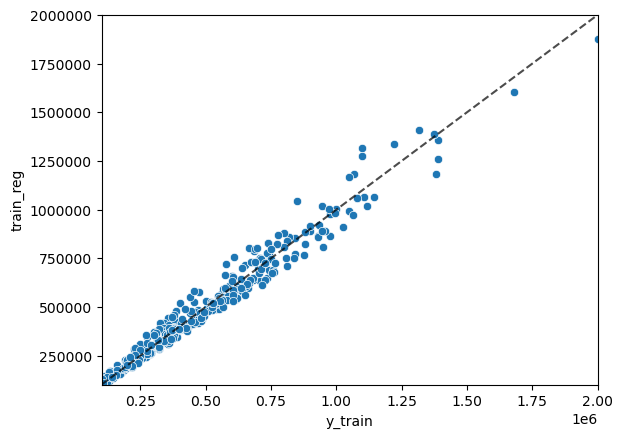

mapetrain,  2
6.388047111672804
mapetest,  2
6.707389485098296


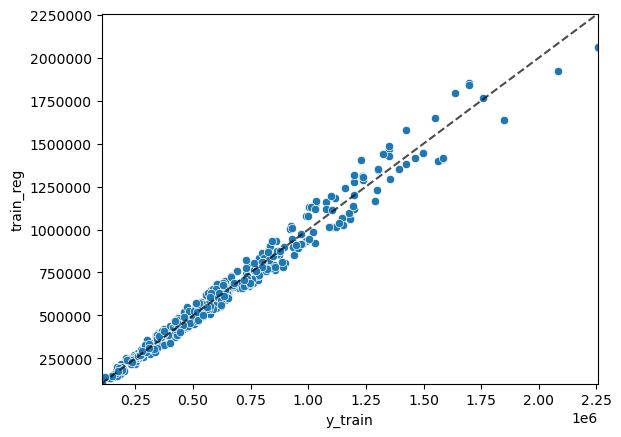

mapetrain,  3
12.512568145633885
mapetest,  3
10.564275161133846


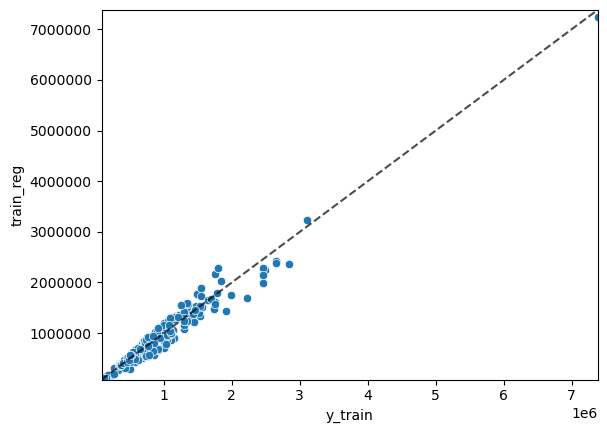

In [13]:
tier_list = [1, 2, 3]

for tier in tier_list:
    data_ML_2 = data_ML.loc[data_ML['tiers'] == tier]
    X = data_ML_2[['type_bien', 
       'nomb_piece', 'terr_m2', 'hab_m2',"Year"]]
    y = data_ML_2['Valeur fonciere']
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    train_reg = reg.predict(X_train)
    test_reg = reg.predict(X_validation)
    mapetrain = mean_absolute_percentage_error(train_reg, y_train) * 100 
    mapetest = mean_absolute_percentage_error(test_reg, y_validation) * 100 
    print('mapetrain, ', tier)
    print(mapetrain)
    print('mapetest, ', tier)
    print(mapetest)
    
    results = pd.DataFrame({
    'y_train': y_train,
    'train_reg': train_reg })
    results['diff'] = (results['train_reg'] - results['y_train'])
    results['diff'] = np.sqrt(results['diff']**2)
    sns.scatterplot(data=results, x='y_train', y='train_reg')

    lims = [
        np.min([results['y_train'].min(), results['train_reg'].min()]),
        np.max([results['y_train'].max(), results['train_reg'].max()])
    ]

    plt.plot(lims, lims, 'k--', alpha=0.7)  # ligne en tiret noir (k--)
    plt.xlim(lims)
    plt.ylim(lims)

    plt.ticklabel_format(style='plain', axis='y')
    joblib.dump(reg, 'model_tier_'+str(tier)+'.pkl')

    # Show plot
    plt.show()      
    

# Base model - Regression Tree

In [15]:
tier_list = [1, 2, 3]

results = pd.DataFrame({'tiers' : [] , 'n_estimators' : [], 'max_depth' : [], 'min_samples_leaf' : [], 'mape' : []})

# Automating the fine tuning for each tiers
for tier in tier_list:
    data_ML_2 = data_ML.loc[data_ML['tiers'] == tier]
    X = data_ML_2[['type_bien', 
       'nomb_piece', 'terr_m2', 'hab_m2',"Year"]]
    y = data_ML_2['Valeur fonciere']
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)
    

    n_est = [5 , 10 , 15, 30, 50, 100, 200]
    max_depth_ = [5, 10, 20, None] 
    min_samples_leaf = [1,2,5,10]

    for n_estim in n_est:
        for max_d in max_depth_:
            for samp_leaf in min_samples_leaf:

                model = RandomForestRegressor(n_estimators=n_estim, random_state=42, max_depth = max_d, min_samples_leaf = samp_leaf)
                model.fit(X_train, y_train)

                y_pred = model.predict(X_validation)

                mse = mean_squared_error(y_validation, y_pred)
                mapetest = mean_absolute_percentage_error(y_pred, y_validation) * 100
                results_temp = pd.DataFrame({'tiers' : [tier] , 'n_estimators' : [n_estim], 'max_depth' : [max_d], 'min_samples_leaf' : [samp_leaf], 'mape' : [mapetest]})
                results = pd.concat([results, results_temp], ignore_index = True)
                

# Best Mape configuration

In [16]:
results.loc[results['tiers'] == 1].sort_values(by='mape', ascending = True).head(3)

,tiers,n_estimators,max_depth,min_samples_leaf,mape
61,1.00,30.00,NaN,2.00,7.90
57,1.00,30.00,20.00,2.00,7.90
101,1.00,200.00,10.00,2.00,7.90


In [17]:
results.loc[results['tiers'] == 2].sort_values(by='mape', ascending = True).head(3)

,tiers,n_estimators,max_depth,min_samples_leaf,mape
209,2.00,200.00,5.00,2.00,6.54
193,2.00,100.00,5.00,2.00,6.57
208,2.00,200.00,5.00,1.00,6.57


In [18]:
results.loc[results['tiers'] == 3].sort_values(by='mape', ascending = True).head(3)

,tiers,n_estimators,max_depth,min_samples_leaf,mape
332,3.00,200.00,NaN,1.00,8.57
328,3.00,200.00,20.00,1.00,8.57
324,3.00,200.00,10.00,1.00,8.62


# Random tree regression model perform better than the simple linear regression but not in all cases. In a more advance version of the tool we could specify which type of models directly in the API. For simplicity purposes we will use the linear regression model because we are already in the industry standards for those kind of regression.